<a href="https://colab.research.google.com/github/Zen0007/study_documentation./blob/main/prediction_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = yf.download('BBCA.JK',start='2022-01-01',end='2023-05-16')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,7325.0,7400.0,7300.0,7325.0,7045.549805,54287400
2022-01-04,7325.0,7450.0,7325.0,7400.0,7117.688477,70624000
2022-01-05,7450.0,7525.0,7375.0,7450.0,7165.780762,76164900
2022-01-06,7500.0,7525.0,7425.0,7475.0,7189.827148,63657100
2022-01-07,7550.0,7700.0,7500.0,7650.0,7358.150391,143433300
...,...,...,...,...,...,...
2023-05-09,8950.0,8975.0,8900.0,8925.0,8925.000000,40929600
2023-05-10,8925.0,8950.0,8900.0,8925.0,8925.000000,45322600
2023-05-11,8900.0,8900.0,8800.0,8825.0,8825.000000,81993900


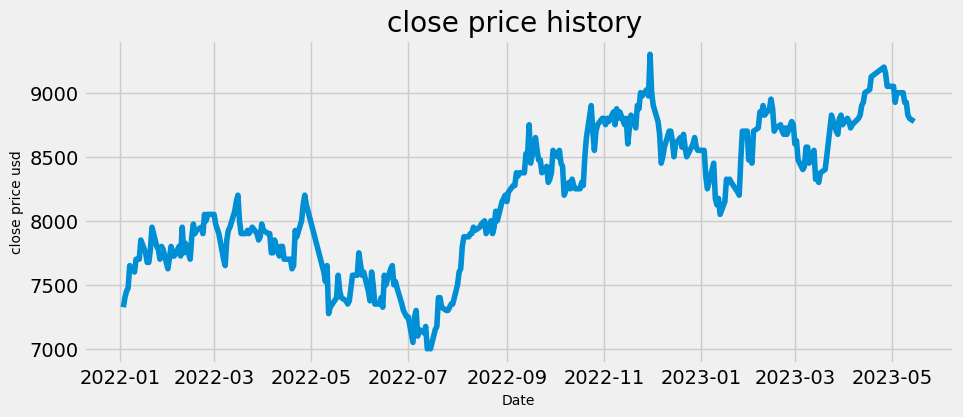

In [ ]:
plt.figure(figsize=(10,4))
plt.title('close price history ')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('close price usd',fontsize=10)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
traning_data_len = math.ceil(len(dataset) * .8)

traning_data_len

266

In [ ]:
scalern = MinMaxScaler(feature_range=(0,1))
scalern_data = scalern.fit_transform(dataset)
scalern_data

array([[0.14130435],
       [0.17391304],
       [0.19565217],
       [0.20652174],
       [0.2826087 ],
       [0.26086957],
       [0.30434783],
       [0.30434783],
       [0.30434783],
       [0.36956522],
       [0.32608696],
       [0.29347826],
       [0.29347826],
       [0.33695652],
       [0.41304348],
       [0.34782609],
       [0.33695652],
       [0.30434783],
       [0.34782609],
       [0.33695652],
       [0.27173913],
       [0.34782609],
       [0.31521739],
       [0.31521739],
       [0.34782609],
       [0.31521739],
       [0.41304348],
       [0.32608696],
       [0.35869565],
       [0.30434783],
       [0.38043478],
       [0.42391304],
       [0.39130435],
       [0.40217391],
       [0.41304348],
       [0.39130435],
       [0.45652174],
       [0.43478261],
       [0.45652174],
       [0.45652174],
       [0.42391304],
       [0.39130435],
       [0.30434783],
       [0.2826087 ],
       [0.36956522],
       [0.40217391],
       [0.41304348],
       [0.467

In [ ]:
train_data= scalern_data[0:traning_data_len , :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.14130435, 0.17391304, 0.19565217, 0.20652174, 0.2826087 ,
       0.26086957, 0.30434783, 0.30434783, 0.30434783, 0.36956522,
       0.32608696, 0.29347826, 0.29347826, 0.33695652, 0.41304348,
       0.34782609, 0.33695652, 0.30434783, 0.34782609, 0.33695652,
       0.27173913, 0.34782609, 0.31521739, 0.31521739, 0.34782609,
       0.31521739, 0.41304348, 0.32608696, 0.35869565, 0.30434783,
       0.38043478, 0.42391304, 0.39130435, 0.40217391, 0.41304348,
       0.39130435, 0.45652174, 0.43478261, 0.45652174, 0.45652174,
       0.42391304, 0.39130435, 0.30434783, 0.2826087 , 0.36956522,
       0.40217391, 0.41304348, 0.4673913 , 0.5       , 0.52173913,
       0.43478261, 0.39130435, 0.39130435, 0.40217391, 0.39130435,
       0.40217391, 0.41304348, 0.39130435, 0.36956522, 0.38043478])]
[0.42391304347826075]

[array([0.14130435, 0.17391304, 0.19565217, 0.20652174, 0.2826087 ,
       0.26086957, 0.30434783, 0.30434783, 0.30434783, 0.36956522,
       0.32608696, 0.29347826, 0.29

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(206, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

206/206 [==============================] - 10s 30ms/step - loss: 0.0122


In [ ]:
test_data=scalern_data[traning_data_len - 60 : ,:]

x_test = []
y_test = dataset[traning_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
PredictioN = model.predict(x_test)
PredictioN = scalern.inverse_transform(PredictioN)

3/3 [==============================] - 1s 14ms/step


In [ ]:
rase = np.sqrt(np.mean(PredictioN-y_test)**2)
rase

194.36140210700756

<ipython-input-30-a28b03bd5292>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['PredictioN'] = PredictioN


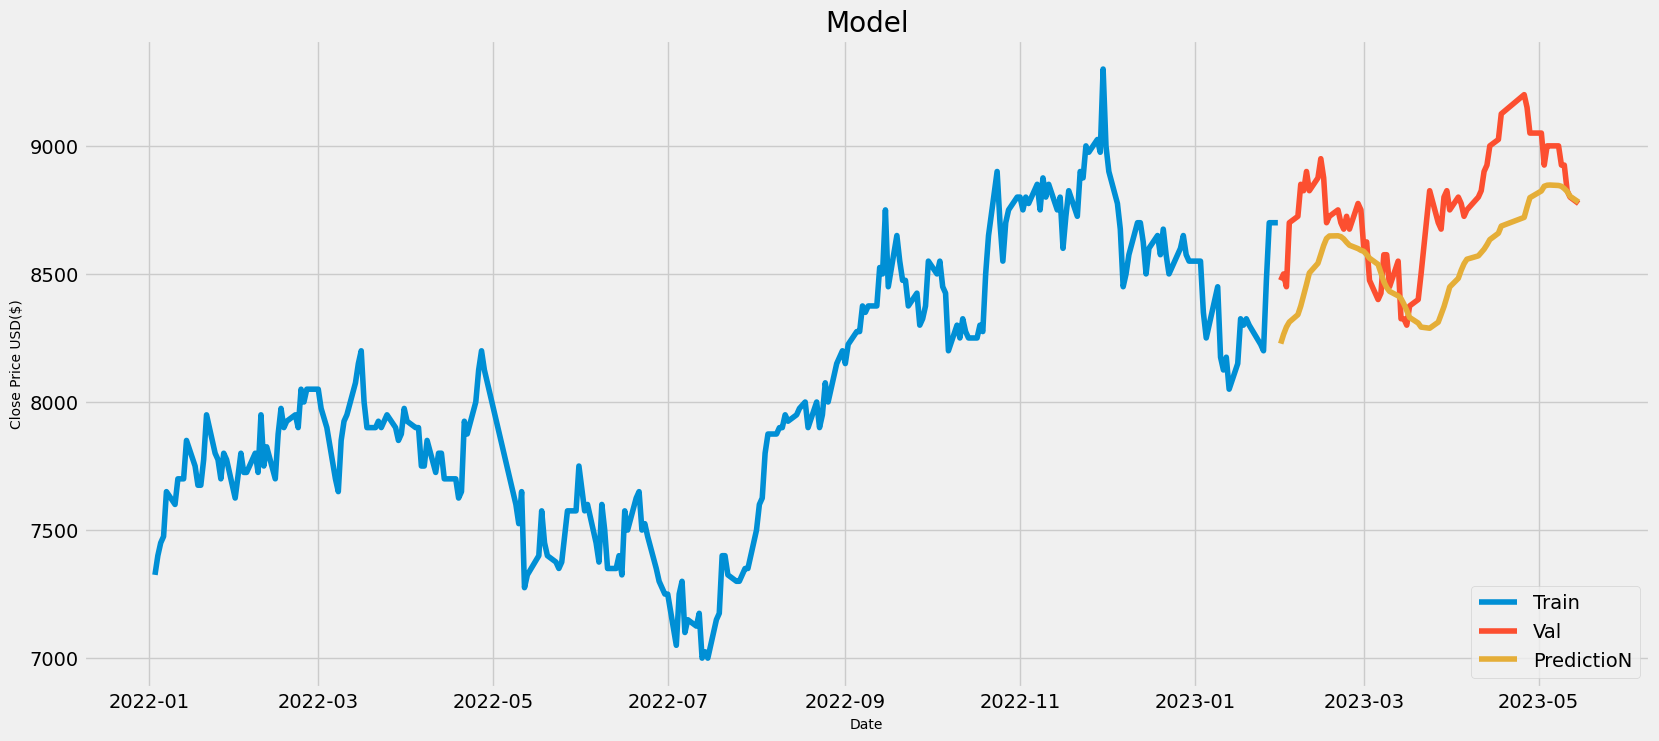

In [ ]:
traiN = data[:traning_data_len]
valid = data[traning_data_len:]
valid['PredictioN'] = PredictioN
plt.figure(figsize=(18,8))
plt.title('Model')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price USD($)',fontsize=10)
plt.plot(traiN['Close'])
plt.plot(valid[['Close','PredictioN']])
plt.legend(['Train' ,'Val', 'PredictioN'],loc='lower right')
plt.show()

In [ ]:
valid

,Close,PredictioN
Date,,
2023-01-31,8475.0,8227.875977
2023-02-01,8500.0,8263.780273
2023-02-02,8450.0,8292.714844
2023-02-03,8700.0,8312.066406
2023-02-06,8725.0,8341.031250
...,...,...
2023-05-09,8925.0,8842.238281
2023-05-10,8925.0,8833.392578
2023-05-11,8825.0,8822.103516


In [ ]:
bbca_stock = yf.download('BBCA.JK',start='2022-06-01',end='2023-05-16')
New_df = bbca_stock.filter(['Close'])
last_60_day = New_df[-60:].values
last_60_day_scaler = scalern.transform(last_60_day)

X_test = []
X_test.append(last_60_day_scaler)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
Pred_Price = model.predict(X_test)
Pred_Price=scalern.inverse_transform(Pred_Price)

print(Pred_Price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 24ms/step
[[8754.624]]


In [ ]:
bbca_stock2 = yf.download('BBCA.JK',start='2022-06-01',end='2023-05-18')
print([[bbca_stock2['Open']],[bbca_stock2['Close']]])
#print(bbca_stock2['Close'])

[*********************100%***********************]  1 of 1 completed
[[Date
2022-06-02    7625.0
2022-06-03    7600.0
2022-06-06    7550.0
2022-06-07    7300.0
2022-06-08    7500.0
               ...  
2023-05-10    8925.0
2023-05-11    8900.0
2023-05-12    8750.0
2023-05-15    8875.0
2023-05-16       0.0
Name: Open, Length: 238, dtype: float64], [Date
2022-06-02    7575.0
2022-06-03    7600.0
2022-06-06    7450.0
2022-06-07    7375.0
2022-06-08    7600.0
               ...  
2023-05-10    8925.0
2023-05-11    8825.0
2023-05-12    8800.0
2023-05-15    8775.0
2023-05-16    8700.0
Name: Close, Length: 238, dtype: float64]]
